In [514]:
import cv2
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [515]:
#  Main code starts here
#  Location and loading Face Cascade XML
OPENCV_PATH = "/usr/local/lib/python3.6/dist-packages/cv2/data"
faceXML = os.path.join(OPENCV_PATH,'haarcascade_frontalface_default.xml')
faceCascade = cv2.CascadeClassifier(faceXML)

baseDir = "/home/CV/FaceData_Test"
folderList = ['A']
folderPathList = [os.path.join(baseDir,folder) for folder in folderList]



In [516]:
def process_images_from_directory(faceCascade, directory, scaleFactor=1.07, minNeighbors=3, minSize=(100,100), maxSize=(400,400)):
    imageDictionary = dict() 
    for directoryPath, directoryNames, fileNames in os.walk(directory):
        for fileName in fileNames:
            imageFile = os.path.join(directoryPath, fileName) 
            # Reads image into RGB for histogram comparison
            img = cv2.imread(imageFile)
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            faces = faceCascade.detectMultiScale(img_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize, maxSize=maxSize)
            imageDictionary[fileName] = (img_gray, img_rgb, faces)  
    return imageDictionary

def process_image_from_list(faceCascade, image_list, scaleFactor=1.07, minNeighbors=8, minSize=(100,100), maxSize=(400,400)):
    imageList = list()
    for imageFile in image_list:
        # Reads image into RGB for histogram comparison
        img = cv2.imread(imageFile)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = faceCascade.detectMultiScale(img_gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize, maxSize=maxSize)
        imageList.append((imageFile, img_gray, img_rgb, faces))
    
    return imageList

def Sort_Tuple(tup):  
  
    # reverse = None (Sorts in Ascending order)  
    # key is set to sort using second element of  
    # sublist lambda has been used  
    tup.sort(key = lambda x: x[0])  
    return tup  



In [517]:
# this runs face detection with the settings across all images in double dictionary
imageDictionary = {folderName : process_images_from_directory(faceCascade, os.path.join(baseDir,folderName)) for folderName in folderList}


obamaDictionary = {folderName : process_images_from_directory(faceCascade, os.path.join(baseDir,folderName)) for folderName in ['ObamaTemplate']}


(135, 135)
128 128
[[ 55  67 135 135]]


<function matplotlib.pyplot.show(*args, **kw)>

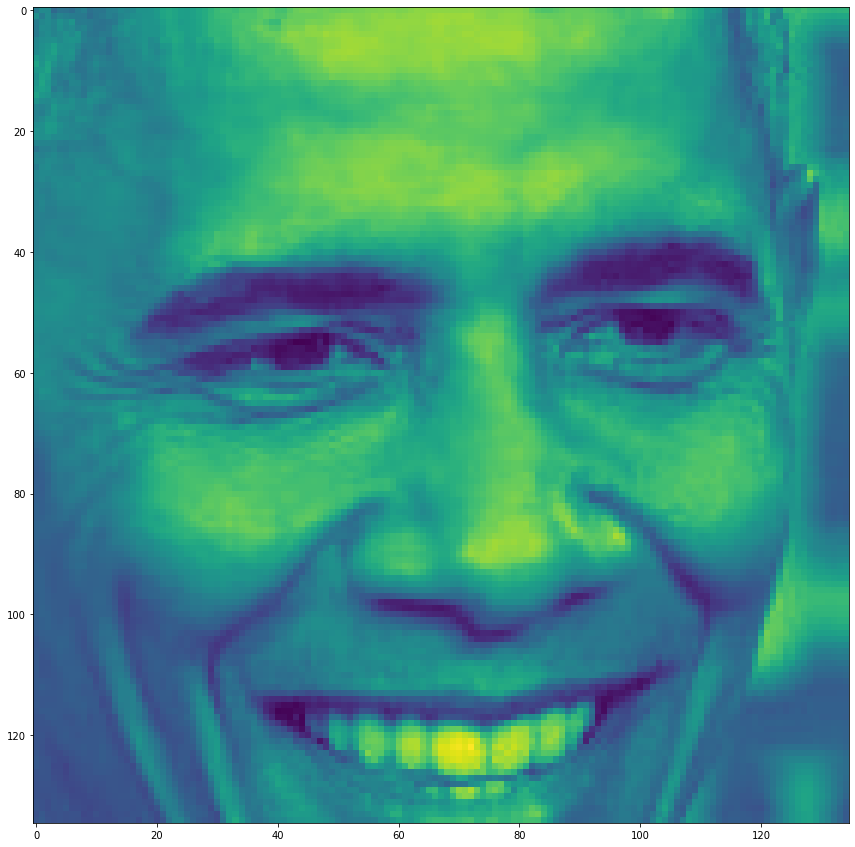

In [518]:
gray_obama_image, rgb_obama_image, obama_face = obamaDictionary['ObamaTemplate']['ObamaTemplate0.jpg']

o_x, o_y, o_w, o_h = obama_face[0]


obama_face_template = gray_obama_image[o_y:o_y+o_h, o_x:o_x+o_w]

#obama_face_template = gray_obama_image[o_y:o_y+o_h, o_x:o_x+o_w]

print(obama_face_template.shape)
print(h,w)
print(obama_face)

fig = plt.figure(figsize = (15, 15))
ax =fig.add_subplot(1,1,1)
ax.imshow(obama_face_template)
plt.show


Text(0.5, 1.0, 'sqrdiff_norm')

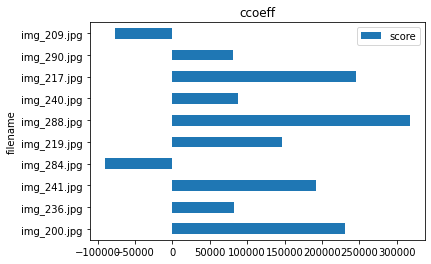

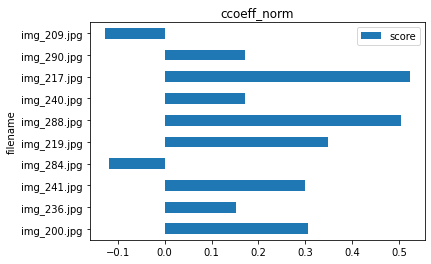

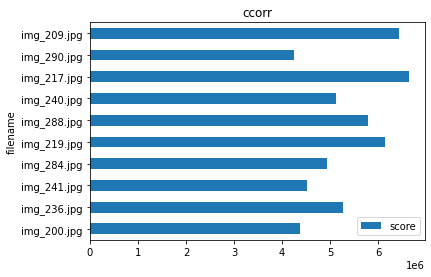

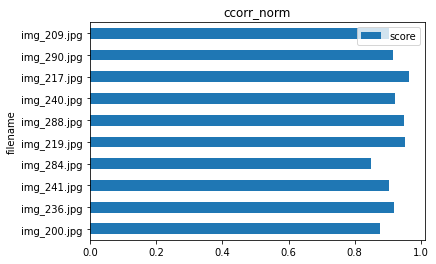

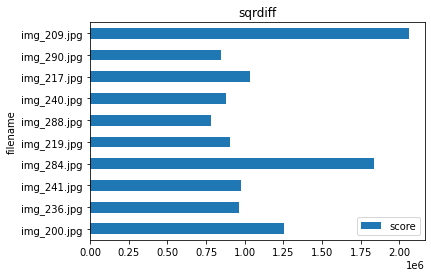

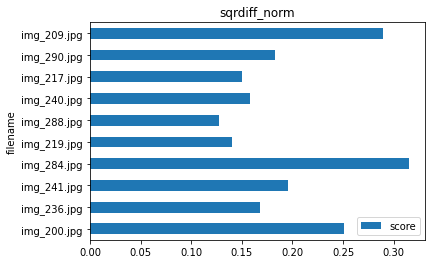

In [519]:
scale_size = (20,20)
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
#scores_list = [cv2.matchTemplate(resized_obama_template,resized_test_face, eval(meth))[0][0] for meth in methods]
scores = []

#imageDictionary[folder][filename] = (igray, rgb, faces)
for folder in imageDictionary:
    for test_file in imageDictionary[folder]:
        test_gray, test_rgb, test_faces = imageDictionary[folder][test_file]
        
        
        for (x,y,w,h) in list (test_faces):
            
            face_to_identify = test_gray[y:y+h, x:x+w]                        
            resized_obama_face = cv2.resize(obama_face_template, scale_size, interpolation = cv2.INTER_AREA)
            resized_test_face = cv2.resize(face_to_identify, scale_size, interpolation = cv2.INTER_AREA)
            
            for meth in methods:
                method = eval(meth)
                score = cv2.matchTemplate(resized_obama_face, resized_test_face, method)                
                scores.append([meth, folder, test_file, score[0][0]])
                #scores.append([meth, folder, test_file, score[0][0]])

#create lists to split the data because I spent to long trying to get a plot out of my scores list of tuples and needed to move on. 
#hopefully in the future I can figure out how to extract what I need and not have to create these lists and if statements. 
scores = Sort_Tuple(scores)                
ccoeff = [] 
ccoeff_norm = []
tm = []
tm_norm = []
sqdiff = []
sqdiff_norm = []


for meth, folder, test_file, score in scores:
    #print(meth,folder,test_file,score) 
    if meth == 'cv2.TM_CCOEFF':
        ccoeff.append([test_file,score])
    if meth == 'cv2.TM_CCOEFF_NORMED':
        ccoeff_norm.append([test_file,score])
    if meth == 'cv2.TM_CCORR':
        tm.append([test_file,score])
    if meth == 'cv2.TM_CCORR_NORMED':
        tm_norm.append([test_file,score])
    if meth == 'cv2.TM_SQDIFF':
        sqdiff.append([test_file,score])
    if meth == 'cv2.TM_SQDIFF_NORMED':
        sqdiff_norm.append([test_file,score])
        

df = pd.DataFrame(ccoeff, columns=['filename','score']).set_index('filename')
df.plot.barh()
plt.title('ccoeff')
    
df = pd.DataFrame(ccoeff_norm, columns=['filename','score']).set_index('filename')
df.plot.barh()
plt.title('ccoeff_norm')

df = pd.DataFrame(tm, columns=['filename','score']).set_index('filename')
df.plot.barh()
plt.title('ccorr')

df = pd.DataFrame(tm_norm, columns=['filename','score']).set_index('filename')
df.plot.barh()
plt.title('ccorr_norm')

df = pd.DataFrame(sqdiff, columns=['filename','score']).set_index('filename')
df.plot.barh()
plt.title('sqrdiff')

df = pd.DataFrame(sqdiff_norm, columns=['filename','score']).set_index('filename')
df.plot.barh()
plt.title('sqrdiff_norm')


The images containing obama are:      ['img_217.jpg']


Images in Directory are below: 




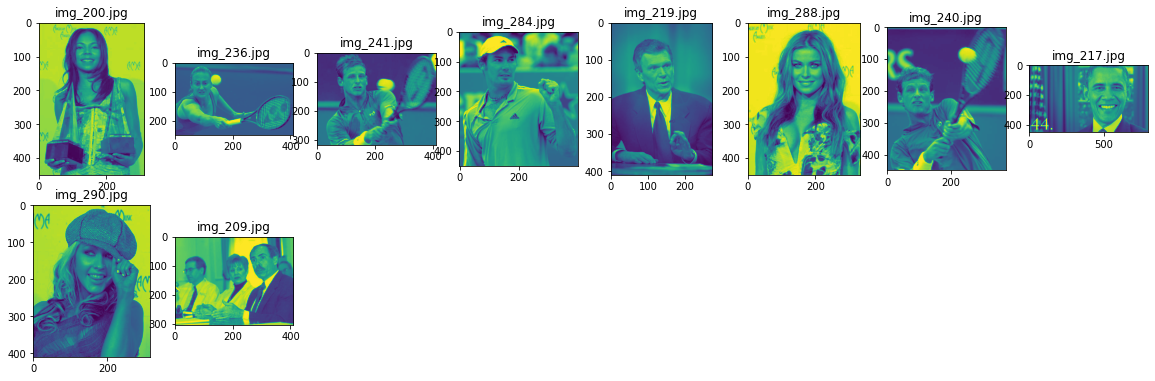

In [520]:
#print(ccoeff_norm)
obama_predictions = []
for filename, score in ccoeff_norm:
    if  score >= .515:
        obama_predictions.append(filename)


print('The images containing obama are:     ', obama_predictions)

print('\n\nImages in Directory are below: \n\n')

        
# this plots one directory 
plt.figure(figsize=(20,100))
folderName = 'A'
for index, imageName in enumerate(imageDictionary[folderName]):
    imageData = imageDictionary[folderName][imageName][0]
    plt.subplot(30,8,index+1)
    plt.imshow(imageData)
    plt.title(imageName)

The Below code is the same as above except now it includes all of the directories. I did this so you could see how I tested which method I was going to use. Also the code below doesn't plot anything. This is to ensure that I don't have unreadable and a huge number of plots. 

In [521]:
baseDir = "/home/CV/FaceData"
folderList = ['A','B','C','D','E']

In [522]:
# this runs face detection with the settings across all images in double dictionary
imageDictionary = {folderName : process_images_from_directory(faceCascade, os.path.join(baseDir,folderName)) for folderName in folderList}


obamaDictionary = {folderName : process_images_from_directory(faceCascade, os.path.join(baseDir,folderName)) for folderName in ['ObamaTemplate']}

(135, 135)
114 114
[[ 55  67 135 135]]


<function matplotlib.pyplot.show(*args, **kw)>

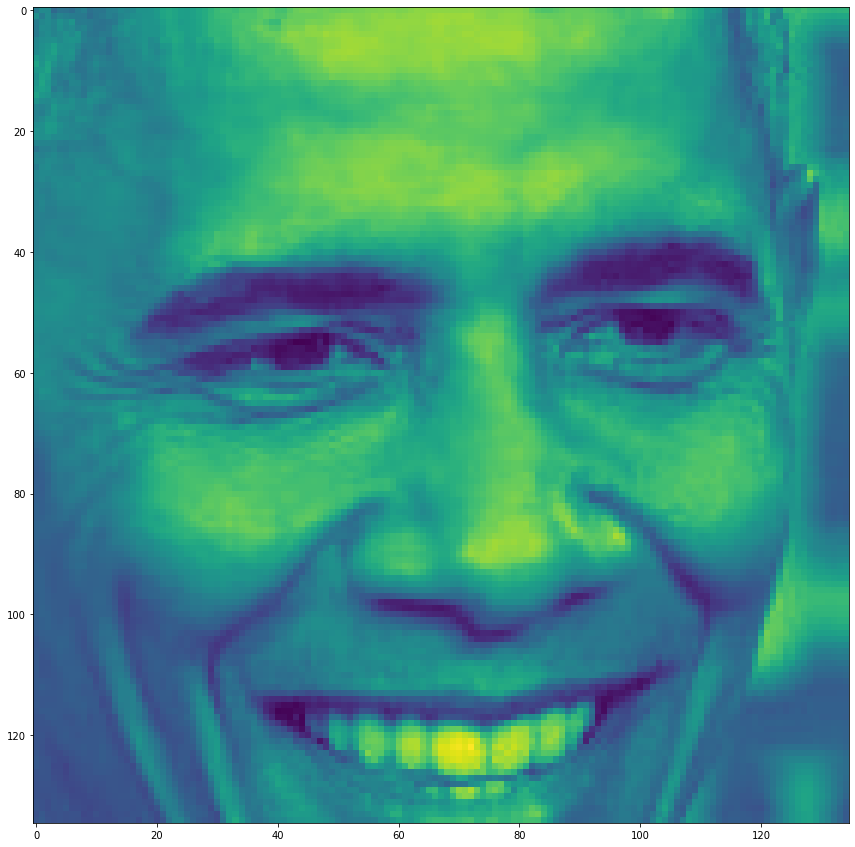

In [523]:
gray_obama_image, rgb_obama_image, obama_face = obamaDictionary['ObamaTemplate']['ObamaTemplate0.jpg']

o_x, o_y, o_w, o_h = obama_face[0]


obama_face_template = gray_obama_image[o_y:o_y+o_h, o_x:o_x+o_w]

#obama_face_template = gray_obama_image[o_y:o_y+o_h, o_x:o_x+o_w]

print(obama_face_template.shape)
print(h,w)
print(obama_face)

fig = plt.figure(figsize = (15, 15))
ax =fig.add_subplot(1,1,1)
ax.imshow(obama_face_template)
plt.show

In [524]:
scale_size = (20,20)
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
#scores_list = [cv2.matchTemplate(resized_obama_template,resized_test_face, eval(meth))[0][0] for meth in methods]
scores = []

#imageDictionary[folder][filename] = (igray, rgb, faces)
for folder in imageDictionary:
    for test_file in imageDictionary[folder]:
        test_gray, test_rgb, test_faces = imageDictionary[folder][test_file]
        
        
        for (x,y,w,h) in list (test_faces):
            
            face_to_identify = test_gray[y:y+h, x:x+w]                        
            resized_obama_face = cv2.resize(obama_face_template, scale_size, interpolation = cv2.INTER_AREA)
            resized_test_face = cv2.resize(face_to_identify, scale_size, interpolation = cv2.INTER_AREA)
            
            for meth in methods:
                method = eval(meth)
                score = cv2.matchTemplate(resized_obama_face, resized_test_face, method)                
                scores.append([meth, folder, test_file, score[0][0]])
                #scores.append([meth, folder, test_file, score[0][0]])

#create lists to split the data because I spent to long trying to get a plot out of my scores list of tuples and needed to move on. 
#hopefully in the future I can figure out how to extract what I need and not have to create these lists and if statements. 
scores = Sort_Tuple(scores)                
ccoeff = [] 
ccoeff_norm = []
tm = []
tm_norm = []
sqdiff = []
sqdiff_norm = []


for meth, folder, test_file, score in scores:
    #print(meth,folder,test_file,score) 
    if meth == 'cv2.TM_CCOEFF':
        ccoeff.append([test_file,score])
    if meth == 'cv2.TM_CCOEFF_NORMED':
        ccoeff_norm.append([test_file,score])
    if meth == 'cv2.TM_CCORR':
        tm.append([test_file,score])
    if meth == 'cv2.TM_CCORR_NORMED':
        tm_norm.append([test_file,score])
    if meth == 'cv2.TM_SQDIFF':
        sqdiff.append([test_file,score])
    if meth == 'cv2.TM_SQDIFF_NORMED':
        sqdiff_norm.append([test_file,score])

In [525]:
#print(ccoeff_norm)
obama_predictions = []
for filename, score in ccoeff_norm:
    if  score >= 0.515:
        obama_predictions.append(filename)
print('The predicted images containing obama are:     ')
for item in obama_predictions:
    print( item)

print('\n\nThe actual images containing obama are: ("A", "img_217.jpg"), ("B", "img_99.jpg"), ("C", "img_62.jpg"), ("D", "img_999.jpg"), ("E", "img_733.jpg")')






The predicted images containing obama are:     
img_527.jpg
img_459.jpg
img_217.jpg
img_491.jpg
img_584.jpg
img_1112.jpg
img_488.jpg
img_940.jpg
img_475.jpg
img_99.jpg
img_1152.jpg
img_1140.jpg
img_225.jpg
img_225.jpg
img_672.jpg
img_591.jpg
img_205.jpg
img_205.jpg
img_581.jpg
img_1230.jpg
img_56.jpg
img_1001.jpg
img_47.jpg
img_1027.jpg
img_36.jpg
img_626.jpg
img_53.jpg
img_1135.jpg
img_1275.jpg
img_740.jpg
img_322.jpg
img_415.jpg
img_1206.jpg
img_588.jpg


The actual images containing obama are: ("A", "img_217.jpg"), ("B", "img_99.jpg"), ("C", "img_62.jpg"), ("D", "img_999.jpg"), ("E", "img_733.jpg")


Overall a very good learning experience even though my method only found 2 of the obama's and had many false positives. I know there are ways to clean this up. I could have ran through each template and combined scores to give a more accurate output. 